In [1]:
from CompilerQC import *
import pickle
from pathlib import Path
import os
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import warnings

warnings.filterwarnings("ignore")

In [2]:
# group settings by hand
results = []
for number in [1, 2]:
    for idx, name in enumerate(
        os.listdir(paths.parameters_path / f"run_{number}/dictionaries")
    ):
        print(idx, name)
        results.append(name.split(".")[0])

0 McForLHZGraphs1.pkl
1 McForDatabase1.pkl
2 EnergyForLHZGraphs1.pkl
3 AdvancedMcForLHZGraphsWithCore1.pkl
0 AdvancedMcForLHZGraphsWithCore2.pkl
1 CoreMcForDatabase2.pkl
2 McForDatabaseWithCore2.pkl
3 EnergyForLHZWithCore2.pkl
4 EnergyForLHZGraphs2.pkl
5 McForDatabase2.pkl
6 CoreEnergyForDatabase2.pkl


In [34]:
df = dict()
for idx, name in enumerate(results):

    number = name[-1]
    dataframe = pd.read_csv(f"results_in_csvs/run_{number}/{name}.csv")
    dataframe["run"] = number
    dataframe["setting"] = name
    dataframe["qubit_ratio"] = dataframe.K / (dataframe.N / 2 * (dataframe.N - 1))
    dataframe["CNOT_ratio"] = (
        dataframe.number_of_CNOTs / dataframe.number_of_CNOTs_in_LHZ
    )
    if name[:-1] in list(df.keys()):
        df[name[:-1]] = df[name[:-1]].append(dataframe)
    else:
        df.update({name[:-1]: dataframe})

In [35]:
dataframe = pd.DataFrame()
for df_ in df.values():
    dataframe = dataframe.append(df_)

In [36]:
# from visualize_graphs import without_compilation
# import matplotlib as mpl
# fig, ax = plt.subplots(figsize=(10, 10))
# title = 'core vs no core'
# x_axis = 'N'
# ax = dataframe[np.logical_and(dataframe.core==False, dataframe.K != dataframe.N / 2 * (dataframe.N - 1))].groupby(x_axis).mean().plot(ax=ax, y='CNOT_ratio', label='no core',
#                                                                                                                                           marker="8",
#         linestyle='--',
#         lw=1,
#         alpha=1,
#         grid=False,
#         markersize=10,
#         markerfacecolor='w',
#         markeredgewidth=1.5,
#         color=['red', 'blue', 'lime', 'black', 'orange', 'cyan', 'magenta'],
#     )
# dataframe[np.logical_and(dataframe.core==True, dataframe.K != dataframe.N / 2 * (dataframe.N - 1))].groupby(x_axis).mean().plot(ax=ax,y='CNOT_ratio', label='core',
#                                                                                                                                     marker="8",
#         linestyle='--',
#         lw=1,
#         alpha=1,
#         grid=False,
#         markersize=10,
#         markerfacecolor='w',
#         markeredgewidth=1.5,
#         color=['blue'],
#     )


# ax.axhline(1, linestyle='--', dashes=(7, 3), lw=1, color='grey')


# problem_folder = 'training_set'
# legend_title=""
# compare=True
# if compare:
#     without_compilation(problem_folder).loc[:20]['CNOT_ratio'].plot(
#         ax=ax,
#         marker="8",
#         linestyle='--',
#         lw=1,
#         alpha=0.9,
#         title=title,
#         grid=False,
#         markersize=10,
#         markerfacecolor='w',
#         markeredgewidth=1.5,
#         color='grey',
#     )
# ax.text(11.3,0.8, 'non-compiled', color='grey', fontsize=15, alpha=0.7)

# ax.legend(
# ["no core", "core"],
# title = legend_title,
# title_fontsize = 15,
# borderpad = 1,
# labelspacing=1.3,
# fontsize=14,
# )
# ax.set_title(label=title, fontsize=15)
# ax.yaxis.set_label_coords(-0.2, .5)
# ax.set_xlabel(x_axis)
# ax.set_xticks([i for i in range(4, 21) if i%2==0])
# ax.set_yticks(np.arange(1, 4.2, .8))
# ax.xaxis.set_tick_params(labelsize=14)
# ax.yaxis.set_tick_params(labelsize=14)
# ax.set_yscale('log')
# #      ax.set_ylim(0, 10)
# ax.yaxis.set_major_formatter(mpl.ticker.ScalarFormatter())
# ax.yaxis.set_minor_formatter(mpl.ticker.ScalarFormatter()) # <---- Added

# ax.set_ylabel(r'#CNOTs $\frac{compiled}{lhz}$', rotation=0, fontsize=15)

# ax.figure.savefig(paths.plots / f"Figures/result_plots/{title}_compare_{compare}.png", bbox_inches='tight')

In [37]:
plt.rcParams["text.usetex"] = False

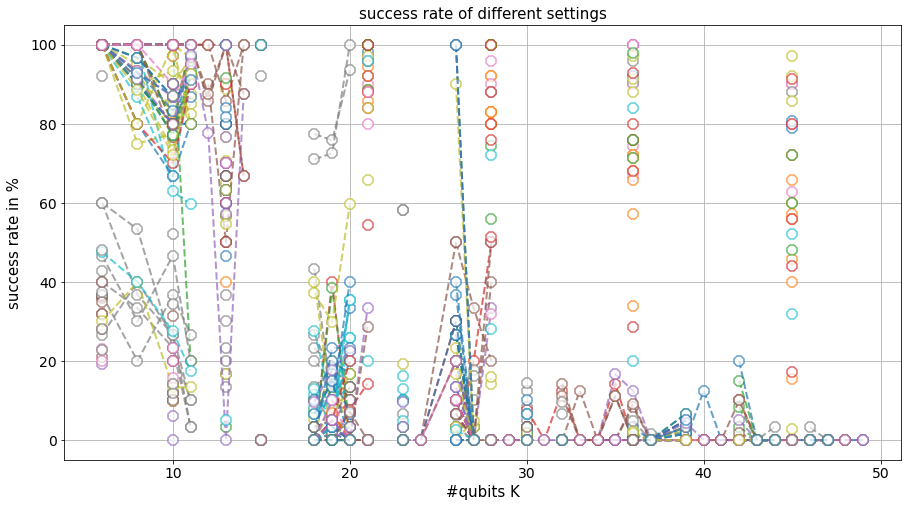

In [49]:
dataframe["success"] = (
    100
    * (
        (dataframe.number_of_3er_plaquettes + dataframe.number_of_4er_plaquettes)
        >= 1 * dataframe.C
    )
).to_list()
x_axis = "K"
y_axis = "success"
number_of_settings = dataframe["number_of_setting"].unique()
max_ = 50
dataframe_ = dataframe[dataframe.K < max_]
# complete graphs == 1, else < 1
dataframe_ = dataframe_[dataframe_.qubit_ratio <= 1]
df_ = (
    dataframe_.loc[dataframe_["number_of_setting"].isin(number_of_settings)]
    .groupby(["number_of_setting", "setting", x_axis])
    .mean()
)
df_ = df_[df_.groupby(level=[0, 1]).size() > 0]


r = range(dataframe.K.min(), max_)

# df_ = (
#     df_["success"]
#     .unstack(fill_value=0)
#     .reindex(columns=r, fill_value=0)
#     .stack(dropna=False)
#     .to_frame(name="success")
# )

fig, ax = plt.subplots(figsize=(15, 8))
ax = (
    df_.reset_index()
    .pivot(x_axis, ["number_of_setting", "setting"], y_axis)
    .plot(
        ax=ax,
        marker="8",
        linestyle="--",
        lw=2,
        alpha=0.7,
        grid=True,
        markersize=10,
        markerfacecolor="w",
        markeredgewidth=1.5,
        legend=False,
    )
)
ax.set_ylabel(f"success rate in %", fontsize=15)
title = "success rate of different settings"
ax.set_title(label=title, fontsize=15)
ax.yaxis.set_label_coords(-0.05, 0.5)

ax.set_xlabel("#qubits K", fontsize=15)
# ax.set_xticks([i for i in range(4, 21) if i%2==0])
ax.set_yticks([10 * i for i in range(0, 11) if i % 2 == 0])
ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14)
plt.savefig(paths.plots / f"Figures/result_plots/various_settings.pdf")

In [50]:
df_ = (
    dataframe_.loc[dataframe_["number_of_setting"].isin(number_of_settings)]
    .groupby(["number_of_setting", "setting", x_axis])
    .mean()
)
df_

N     C  original_C  \
number_of_setting setting                         K                            
0                 AdvancedMcForLHZGraphsWithCore1 6    4.0   3.0         3.0   
                                                  10   5.0   6.0         6.0   
                                                  15   6.0  10.0        10.0   
                                                  21   7.0  15.0        15.0   
                                                  28   8.0  21.0        21.0   
...                                                    ...   ...         ...   
31                EnergyForLHZGraphs1             15   6.0  10.0        10.0   
                                                  21   7.0  15.0        15.0   
                                                  28   8.0  21.0        21.0   
                                                  36   9.0  28.0        28.0   
                                                  45  10.0  36.0        36.0   

                                                      C_density  \
number_of_setting setting                         K               
0                 AdvancedMcForLHZGraphsWithCore1 6    0.000000   
                                                  10   0.000000   
                                                  15   0.000000   
                                                  21   0.066667   
                                                  28   0.095238   
...                                                         ...   
31                EnergyForLHZGraphs1             15   0.207000   
                                                  21   0.237333   
                                                  28   0.312381   
                                                  36   0.468571   
                                                  45   0.729031   

                                                      number_of_plaquettes  \
number_of_setting setting                         K                          
0                 AdvancedMcForLHZGraphsWithCore1 6               3.000000   
                                                  10              6.000000   
                                                  15             10.000000   
                                                  21             14.000000   
                                                  28             19.000000   
...                                                                    ...   
31                EnergyForLHZGraphs1             15              7.930000   
                                                  21             11.440000   
                                                  28             14.440000   
                                                  36             14.880000   
                                                  45              9.754902   

                                                      number_of_3er_plaquettes  \
number_of_setting setting                         K                              
0                 AdvancedMcForLHZGraphsWithCore1 6                   2.000000   
                                                  10                  3.000000   
                                                  15                  4.000000   
                                                  21                  4.725490   
                                                  28                  4.176471   
...                                                                        ...   
31                EnergyForLHZGraphs1             15                  5.610000   
                                                  21                  7.890000   
                                                  28                  9.370000   
                                                  36                 10.900000   
                                                  45                  7.352941   

                                                      number_o

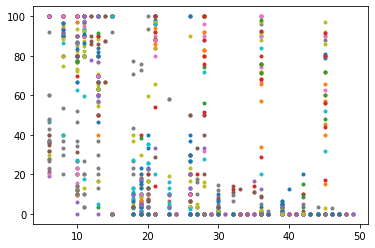